In [1]:
# coding: utf-8
# Calculate the average path length in this network
import pandas as pd
import networkx as nx
from random import randint

In [28]:
import prettyplotlib as ppl

In [2]:
df = pd.read_csv('relArtist_parse.csv')

In [3]:
g = nx.from_pandas_dataframe(df, 'Artist', 'RelArtist')

In [4]:
h = list(nx.connected_component_subgraphs(g))

In [5]:
total = len(h[0])
allArtists = h[0].nodes()

In [8]:
gr = []
for i in allArtists:
    gr.append( nx.shortest_path_length(h[0],'Bruce Springsteen', i) )

In [11]:
import matplotlib.pyplot as plt

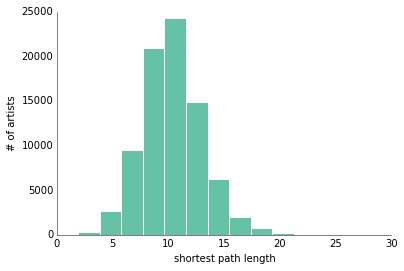

In [64]:
tempdf = pd.DataFrame(gr)
fig = ppl.hist(tempdf[0],bins=15)
plt.xlabel("shortest path length")
plt.ylabel("# of artists")
plt.savefig('springsteen.eps')

Object `ppl.xlabel` not found.


In [15]:
1.0*sum(gr)/total

10.246813710515061

In [16]:
means = []

In [84]:
for i in range(0,15):
	sum = 0
	searchArtist = allArtists[ randint(0, total) ]
	for j in allArtists:
		sum += nx.shortest_path_length(h[0], searchArtist, j)
	means.append( [i, 1.0*sum / total] )
    

In [85]:
means

[[0, 11.076800879819148],
 [1, 15.318164599498992],
 [2, 12.680430133805828],
 [3, 18.50420969023034],
 [4, 15.44775462821531],
 [5, 11.428704099712837],
 [6, 12.334392374900714],
 [7, 12.996810655587463],
 [8, 15.116869310197348],
 [9, 13.466658520193072],
 [10, 11.864458972322357],
 [11, 13.377014724751023],
 [12, 12.756363414187083],
 [13, 15.205071179813038],
 [14, 12.934013563878537],
 [0, 11.564929431172482],
 [1, 12.978762143337203],
 [2, 16.017596382965724],
 [3, 13.207478462760433],
 [4, 15.831991201808517],
 [5, 11.744852446997006],
 [6, 15.870666585201931],
 [7, 10.618720596321868],
 [8, 11.072365124946538],
 [9, 12.438418769475163],
 [10, 11.439946233274272],
 [11, 12.678413881591005],
 [12, 12.353259607747296],
 [13, 13.925899676177675],
 [14, 12.377307997800452],
 [0, 15.56607808394941],
 [1, 12.67301276959736],
 [2, 14.181499358465205],
 [3, 14.01138877008615],
 [4, 10.546453229058471],
 [5, 14.832651066169731],
 [6, 12.356387853607869],
 [7, 14.04335553247388],
 [8, 13.

In [86]:
mdf = pd.DataFrame(means)

In [87]:
mdf[1].mean()

13.578608785971772

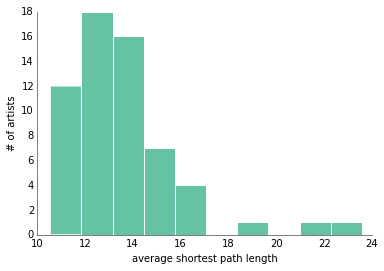

In [88]:
fig = ppl.hist(mdf[1],bins=10)
plt.xlabel("average shortest path length")
plt.ylabel("# of artists")
plt.savefig('avgShortestPath.eps')